In [20]:
from utils import *
from model import *
from dataset import *

In [23]:
file_path = '/data/TCN4Flare_agn_data/'
sub_path = 'ztf_agns_20000/'
data_path = '/data/TCN4Flare_agn_data/dataset/'

In [24]:
test_dataset = dataset(file_path, sub_path, data_path)
zg_raw_dataset, zg_raw_agn_params, zg_empty_files = test_dataset.extract_data('zg')
zr_raw_dataset, zr_raw_agn_params, zr_empty_files = test_dataset.extract_data('zr')

print(zg_raw_dataset.shape)
print(zg_raw_agn_params.shape)
print(len(zg_empty_files))

print(zr_raw_dataset.shape)
print(zr_raw_agn_params.shape)
print(len(zr_empty_files))

(17037, 4404, 3)
(17037, 3)
2963
(17827, 4638, 3)
(17827, 3)
2173


In [25]:
zg_fit_dataset, zg_fit_agn_params, zg_fail_agns = test_dataset.GP_fit_raw_dataset('zg', zg_raw_dataset, zg_raw_agn_params)
zr_fit_dataset, zr_fit_agn_params, zr_fail_agns = test_dataset.GP_fit_raw_dataset('zr', zr_raw_dataset, zr_raw_agn_params)

print(zg_fit_dataset.shape)
print(zg_fit_agn_params.shape)
print(zg_fail_agns.shape)

print(zr_fit_dataset.shape)
print(zr_fit_agn_params.shape)
print(zr_fail_agns.shape)

/home/supernova/anaconda3/envs/tensorflow/lib/python3.10/site-packages/celerite/terms.py:564: RuntimeWarning: overflow encountered in exp
  w0 = np.sqrt(3.0) * np.exp(-log_rho)
/home/supernova/anaconda3/envs/tensorflow/lib/python3.10/site-packages/celerite/terms.py:566: RuntimeWarning: invalid value encountered in double_scalars
  return (w0*S0, w0*w0*S0/self.eps, w0, self.eps)
/home/supernova/anaconda3/envs/tensorflow/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:596: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0


GP_fit failed for index 784


/home/supernova/anaconda3/envs/tensorflow/lib/python3.10/site-packages/celerite/terms.py:566: RuntimeWarning: overflow encountered in double_scalars
  return (w0*S0, w0*w0*S0/self.eps, w0, self.eps)
/home/supernova/anaconda3/envs/tensorflow/lib/python3.10/site-packages/celerite/terms.py:565: RuntimeWarning: overflow encountered in exp
  S0 = np.exp(2.0 * log_sigma) / w0


GP_fit failed for index 3157
GP_fit failed for index 3521
GP_fit failed for index 4680
GP_fit failed for index 5523
GP_fit failed for index 5604
GP_fit failed for index 5820
GP_fit failed for index 6197
GP_fit failed for index 6301
GP_fit failed for index 6658
GP_fit failed for index 7328


/home/supernova/anaconda3/envs/tensorflow/lib/python3.10/site-packages/celerite/terms.py:565: RuntimeWarning: divide by zero encountered in double_scalars
  S0 = np.exp(2.0 * log_sigma) / w0
/home/supernova/anaconda3/envs/tensorflow/lib/python3.10/site-packages/celerite/terms.py:565: RuntimeWarning: invalid value encountered in double_scalars
  S0 = np.exp(2.0 * log_sigma) / w0


GP_fit failed for index 8706
GP_fit failed for index 10359
GP_fit failed for index 10893
GP_fit failed for index 11265
GP_fit failed for index 14679
GP_fit failed for index 15406
GP_fit failed for index 16277


/home/supernova/anaconda3/envs/tensorflow/lib/python3.10/site-packages/celerite/terms.py:565: RuntimeWarning: overflow encountered in double_scalars
  S0 = np.exp(2.0 * log_sigma) / w0


GP_fit failed for index 1686
GP_fit failed for index 2402
GP_fit failed for index 3668
GP_fit failed for index 5507
GP_fit failed for index 6910
GP_fit failed for index 7898
GP_fit failed for index 8342
GP_fit failed for index 9162
GP_fit failed for index 11529
GP_fit failed for index 12874
GP_fit failed for index 13445
GP_fit failed for index 15098
GP_fit failed for index 15448
(17019, 2167, 3)
(17037, 5)
(18,)
(17814, 2172, 3)
(17827, 5)
(13,)


In [26]:
TCN_model = TCN_model(model_path=r'./model/', model_name='TCN4Flare_128_3_256_1_0.2_9:1.keras')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 2)]         0         
                                                                 
 tcn (TCN)                   (None, 128)               843648    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 843,777
Trainable params: 843,777
Non-trainable params: 0
_________________________________________________________________


In [27]:
# test predict method
zg_y_pred, zg_y_prob = TCN_model.predict(zg_fit_dataset)
zg_flare_idx = np.where(zg_y_pred == 1)[0]
zr_y_pred, zr_y_prob = TCN_model.predict(zr_fit_dataset)
zr_flare_idx = np.where(zr_y_pred == 1)[0]

2025-05-06 19:50:57.571028: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


    458/Unknown - 27s 57ms/step

/home/supernova/桌面/python/TCN4Flare/TCN4Flare/utils.py:182: RuntimeWarning: invalid value encountered in subtract
  x[:,0] = (x[:,0] - mean) / std  # normalization for flux
/home/supernova/桌面/python/TCN4Flare/TCN4Flare/utils.py:182: RuntimeWarning: invalid value encountered in divide
  x[:,0] = (x[:,0] - mean) / std  # normalization for flux


   4842/Unknown - 277s 57ms/step

/home/supernova/anaconda3/envs/tensorflow/lib/python3.10/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


17019/17019 [==============================] - 989s 58ms/step
      3/Unknown - 0s 62ms/step

2025-05-06 20:07:31.331382: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


17814/17814 [==============================] - 745s 42ms/step


In [35]:
print(len(zg_flare_idx), len(zr_flare_idx))
zg_agn_with_flares_params = zg_fit_agn_params[zg_flare_idx]
zr_agn_with_flares_params = zr_fit_agn_params[zr_flare_idx]

agn_with_flares_params = np.vstack((zg_agn_with_flares_params[:, :2], zr_agn_with_flares_params[:, :2]))
unique, counts = np.unique(agn_with_flares_params[:, 0], axis=0, return_counts=True)
agn_with_flares_names = unique[counts > 1]

# agn_with_flares_names = np.unique(agn_with_flares_params[:, 0], axis=0)

print(agn_with_flares_names)

221 218
['LAMOSTJ010039' 'SDSS J003325' 'SDSS J074608' 'SDSS J083243'
 'SDSS J103814' 'SDSS J105600' 'SDSS J134743' 'SDSS J141412']


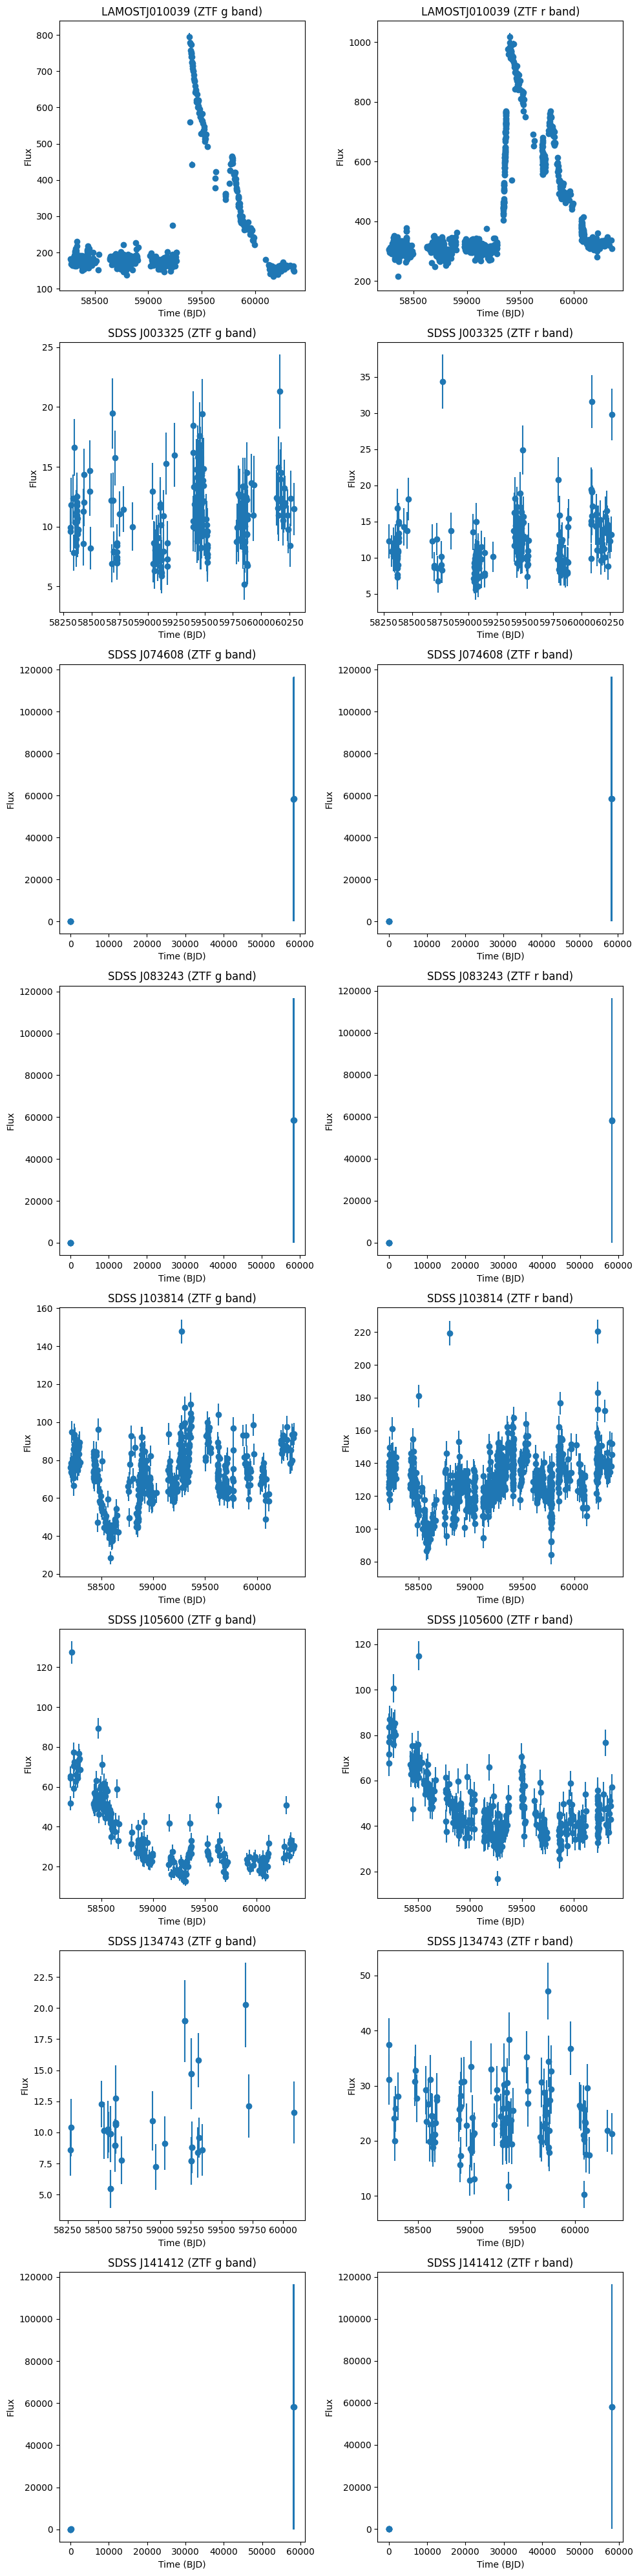

In [36]:
plt.figure(figsize=(10, 5*len(agn_with_flares_names)))
for i, agn_name in enumerate(agn_with_flares_names):
    zg_flare_data = zg_raw_dataset[np.where(zg_raw_agn_params[:,0]==agn_name)[0], :, :].squeeze()
    zg_t = zg_flare_data[:,0]
    zg_flux = zg_flare_data[:,1]
    zg_flux_err = zg_flare_data[:,2]

    zg_t = zg_t[~np.isnan(zg_t)]
    zg_flux = zg_flux[~np.isnan(zg_flux)]
    zg_flux_err = zg_flux_err[~np.isnan(zg_flux_err)]

    zr_flare_data = zr_raw_dataset[np.where(zr_raw_agn_params[:,0]==agn_name)[0], :, :].squeeze()
    zr_t = zr_flare_data[:,0]
    zr_flux = zr_flare_data[:,1]
    zr_flux_err = zr_flare_data[:,2]
    zr_t = zr_t[~np.isnan(zr_t)]
    zr_flux = zr_flux[~np.isnan(zr_flux)]
    zr_flux_err = zr_flux_err[~np.isnan(zr_flux_err)]

    plt.subplot(len(agn_with_flares_names), 2, 2*i+1)
    plt.errorbar(zg_t, zg_flux, yerr=zg_flux_err, fmt='o')
    plt.xlabel('Time (BJD)')
    plt.ylabel('Flux')
    plt.title(agn_name + ' (ZTF g band)')

    plt.subplot(len(agn_with_flares_names), 2, 2*i+2)
    plt.errorbar(zr_t, zr_flux, yerr=zr_flux_err, fmt='o')
    plt.xlabel('Time (BJD)')
    plt.ylabel('Flux')
    plt.title(agn_name + ' (ZTF r band)')

plt.tight_layout()
plt.show()
